<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/fnirs_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing `mne-nirs` new version package

Algumas funcionalidades podem requerer instalar a versão mais nova, em desenvolvimento do pacote nme-nirs.

In [2]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 4.5 MB/s 


In [3]:
#
# New, developing version
# 

!pip install -U --no-deps https://github.com/mne-tools/mne-python/archive/main.zip

#
# You must restart the runtime in order to use newly installed versions.
#

     / 60.6 MB 7.0 MB/s
  Created wheel for mne: filename=mne-0.24.dev0-py3-none-any.whl size=7376690 sha256=a83b5a8edd455ee6a45a75bf14d6df7cb5fafebe58d3a7e599aa71555a2f1d06
  Stored in directory: /tmp/pip-ephem-wheel-cache-8diy68d2/wheels/66/fc/d2/9d32190e71b475f1cabf28474c2cbc9274afb98ff6fa2dc7fd
Successfully built mne


In [4]:
# Requirement already satisfied: mne-nirs in /usr/local/lib/python3.7/dist-packages (0.1.1)
# Requirement already satisfied: mne>=0.21.0 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (0.24.dev0)
# Requirement already satisfied: numpy>=1.11.3 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (1.19.5)
# Requirement already satisfied: scipy>=0.17.1 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (1.4.1)

!pip install mne-nirs

     |████████████████████████████████| 49 kB 2.6 MB/s 
  Created wheel for mne-nirs: filename=mne_nirs-0.1.1-py3-none-any.whl size=66160 sha256=608b1456e3bfde6f9f67a4df4d7a089eb5afd04d6faf5d9cbec9a814e08737df
  Stored in directory: /root/.cache/pip/wheels/04/a9/2e/4b4da6132c2b215b6321154f6b0d103c854394bbda0c556138
Successfully built mne-nirs


In [5]:
#
# Old, stabilished version
# 

# Successfully installed mne-0.23.4 mne-nirs-0.1.1
# !pip install mne-nirs

# Mount Google Drive

Para acesso aos arquivos compartilhados. Tenha certeza de ter adicionado a pasta compartilhada ao seu Google Drive antes.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Common Imports

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import compress

import mne

# Read `snirf` file

`nme-nirs` suporta dentre outros arquivos: 

```
read_raw_boxy
read_raw_brainvision
read_raw_nirx
read_raw_snirf
```

Mas não suporta arquivos `.nirs`. 



# **TO DO**

> * Verificar a possibilidade de empregar arquivos `read_raw_brainvision` diretamente
> * Verificar a possibilidade de conversão de arquivos dos diferentes formatos, em especial `read_raw_.nirs` $\leftrightarrow$ `read_raw_.snirf` $\leftrightarrow$  `read_raw_brainvision` 


In [8]:
for method in dir(mne.io):
  if 'read_raw' in method:
    print(method)

_read_raw
read_raw
read_raw_artemis123
read_raw_bdf
read_raw_boxy
read_raw_brainvision
read_raw_bti
read_raw_cnt
read_raw_ctf
read_raw_curry
read_raw_edf
read_raw_eeglab
read_raw_egi
read_raw_eximia
read_raw_fieldtrip
read_raw_fif
read_raw_gdf
read_raw_hitachi
read_raw_kit
read_raw_nedf
read_raw_nicolet
read_raw_nihon
read_raw_nirx
read_raw_persyst
read_raw_snirf


## Read `.snirf` data

In [110]:
# file_in = '/content/drive/MyDrive/fNIRS - análises compartilhadas/DadosOutroGrupo/2019-02-14_001.snirf'
# file_in = '/content/drive/MyDrive/fNIRS - análises compartilhadas/BIDS-NIRS-Tapping-v0.0.1/rob-luke-BIDS-NIRS-Tapping-388d2cd/sub-01/nirs/sub-01_task-tapping_nirs.snirf'
file_in = '/content/drive/MyDrive/fNIRS - análises compartilhadas/DATA_MotorNeuron/SUBJID_6082/run1.snirf'

raw_intensity = mne.io.read_raw_snirf(file_in, verbose=True)

raw_intensity.load_data()

Loading /content/drive/MyDrive/fNIRS - análises compartilhadas/DATA_MotorNeuron/SUBJID_6082/run1.snirf


<ipython-input-110-140fe299cfd8>:5: RuntimeWarning: The data only contains 2D location information for the optode positions. It is highly recommended that data is used which contains 3D location information for the optode positions. With only 2D locations it can not be guaranteed that MNE functions will behave correctly and produce accurate results. If it is not possible to include 3D positions in your data, please consider using the set_montage() function.
  raw_intensity = mne.io.read_raw_snirf(file_in, verbose=True)


Reading 0 ... 8674  =      0.000 ...   346.960 secs...


<RawSNIRF | run1.snirf, 120 x 8675 (347.0 s), ~8.1 MB, data loaded>

## Convert to Dataframe

Isso é útil para trabalhar com os dados de forma tabular.

In [111]:
df = raw_intensity.to_data_frame()

In [112]:
df.head()

,time,S1_D1 690,S1_D1 830,S1_D2 690,S1_D2 830,S1_D7 690,S1_D7 830,S1_D10 690,S1_D10 830,S1_D11 690,S1_D11 830,S2_D2 690,S2_D2 830,S2_D3 690,S2_D3 830,S2_D11 690,S2_D11 830,S2_D12 690,S2_D12 830,S3_D3 690,S3_D3 830,S3_D4 690,S3_D4 830,S3_D8 690,S3_D8 830,S3_D12 690,S3_D12 830,S3_D13 690,S3_D13 830,S4_D4 690,S4_D4 830,S4_D5 690,S4_D5 830,S4_D13 690,S4_D13 830,S4_D14 690,S4_D14 830,S5_D5 690,S5_D5 830,S5_D6 690,...,S11_D20 690,S11_D20 830,S11_D24 690,S11_D24 830,S11_D28 690,S11_D28 830,S11_D29 690,S11_D29 830,S12_D20 690,S12_D20 830,S12_D21 690,S12_D21 830,S12_D29 690,S12_D29 830,S12_D30 690,S12_D30 830,S13_D21 690,S13_D21 830,S13_D22 690,S13_D22 830,S13_D25 690,S13_D25 830,S13_D30 690,S13_D30 830,S13_D31 690,S13_D31 830,S14_D27 690,S14_D27 830,S14_D28 690,S14_D28 830,S15_D28 690,S15_D28 830,S15_D29 690,S15_D29 830,S15_D32 690,S15_D32 830,S16_D29 690,S16_D29 830,S16_D30 690,S16_D30 830
0,0,216817.666256,913852.456048,169767.213674,454898.739984,160281.424649,875740.761677,178503.371514,986121.517104,275690.421028,710197.293747,313259.159304,1.008201e+06,66873.970703,262131.959368,179340.871354,1.058190e+06,145092.426849,696327.411421,276661.968623,1.044752e+06,299640.855565,916497.954989,406700.826453,825600.927384,227903.146086,671759.270916,334119.736419,887475.467763,657099.519011,383872.104784,120900.254641,71911.913046,632188.895027,422651.002155,93428.708759,63831.439336,585309.378301,714709.889086,943766.545012,...,506778.689494,968027.976756,279659.343297,654359.629450,232355.090285,1.024431e+06,283762.410360,1.053914e+06,84690.277740,525685.980093,79866.514368,90692.428159,32126.499195,162969.496298,85678.756294,297992.544498,10615.077194,13535.975605,52883.106096,59247.285462,794732.312319,1.480217e+06,50053.876027,485353.790714,202534.362940,1.167202e+06,128458.130325,917858.644721,58542.403743,168036.487559,115206.578734,613605.834671,69323.272954,672890.169141,83114.387451,833000.268901,101762.600299,1.730245e+06,95053.439080,1.279395e+06
1,40,217478.755735,912010.518924,169602.369433,453398.046679,159828.173191,875755.377005,177502.721899,980727.056200,277148.416991,708342.626850,311960.369645,1.007856e+06,66799.647377,261977.968750,179298.974063,1.056073e+06,142461.899436,697323.245935,275891.484814,1.043782e+06,299653.225961,915914.500483,406234.191633,825479.106098,228207.225785,672067.938401,332942.028972,887767.059399,653956.266980,383914.591865,120383.979358,71734.134145,621582.806370,421072.464334,93087.125131,64199.288123,585655.480760,714199.061062,943174.843908,...,507097.062718,966523.295575,278498.147949,654521.159074,232937.893003,1.023756e+06,284313.032898,1.052026e+06,83544.253003,525290.413567,79561.026618,90704.617141,31985.995321,160619.808131,85008.590302,297674.430465,10596.399170,13484.994357,52921.674275,59257.278144,795081.422097,1.480498e+06,50813.594723,485131.303460,203762.374490,1.171336e+06,128010.624844,917603.109734,58379.931399,167918.450938,114643.904163,612254.508112,68960.340270,672986.516241,82553.711399,833017.097700,100933.465959,1.728801e+06,92104.306683,1.280079e+06
2,80,215413.319140,901761.849676,168830.959011,451882.457747,159746.769054,873978.712178,174839.033559,982288.361524,275429.257155,702895.918854,312687.081937,1.005106e+06,66215.063880,258827.493424,179781.068608,1.052493e+06,142170.386168,689820.286176,274623.849638,1.035851e+06,299334.127886,910254.642966,405014.622517,822270.384062,226721.938157,659858.995171,329086.991001,874474.770066,657353.524743,382297.675267,123056.965412,72032.406401,639250.282988,419546.989514,94346.153227,63480.974528,585656.509601,711520.385512,940733.244291,...,506446.280901,961458.970098,278721.578732,652756.844501,231024.960695,1.013127e+06,283249.424969,1.044583e+06,82603.615018,523034.883575,79253.296220,90210.963871,30799.718906,160696.152204,85750.581895,294635.070027,10735.804132,13431.479563,52728.928990,58992.159741,795094.691293,1.477336e+06,51252.615609,480532.784022,203836.484875,1.165977e+06,125472.046570,916714.531252,558

## Inspeção inicial dos Dados

In [113]:
print('\nNúmero de Canais:'.ljust(35), df.shape[1] - 1)

max_measure = df.iloc[0::,1::].max().max()
min_measure = df.iloc[0::,1::].min().min()
print('\nIntervalo das medidas:'.ljust(35), min_measure, max_measure)

print('\nCanais por prefixo (source):'.ljust(35))
list_prefix_channels = [x[0:x.find('_')] for x in df.columns[1::]]
summary_prefix_channels = {}
summary_prefix_channels_list = {}
for c in list_prefix_channels:
  if c not in summary_prefix_channels.keys():  
    summary_prefix_channels[c] = list_prefix_channels.count(c)
    summary_prefix_channels_list[c] = [x for x in df.columns[1::] if c+'_' in x]

for c in summary_prefix_channels.keys():  
    print(34*' ',c, summary_prefix_channels[c], '\t', summary_prefix_channels_list[c])

print('\nCanais por sufixo (wave length):'.ljust(30))
list_suffix_channels = [x[x.find(' ')+1::] for x in df.columns[1::]]
summary_suffix_channels = {}
for c in list_suffix_channels:
  if c not in summary_suffix_channels.keys():  
    summary_suffix_channels[c] = list_suffix_channels.count(c)
    print(34*' ',c, summary_suffix_channels[c])
  
print('\nTimes:'.ljust(35), df.shape[0])

print('\nElapse times:'.ljust(30))
for i in range(len(df.time.diff()[1::].value_counts())):
  print(34*' ', df.time.diff()[1::].value_counts().index[i], df.time.diff()[1::].value_counts().values[i])




Número de Canais:                  120

Intervalo das medidas:             152.6091555742339 1859075.5003047977

Canais por prefixo (source):      
                                   S1 10 	 ['S1_D1 690', 'S1_D1 830', 'S1_D2 690', 'S1_D2 830', 'S1_D7 690', 'S1_D7 830', 'S1_D10 690', 'S1_D10 830', 'S1_D11 690', 'S1_D11 830']
                                   S2 8 	 ['S2_D2 690', 'S2_D2 830', 'S2_D3 690', 'S2_D3 830', 'S2_D11 690', 'S2_D11 830', 'S2_D12 690', 'S2_D12 830']
                                   S3 10 	 ['S3_D3 690', 'S3_D3 830', 'S3_D4 690', 'S3_D4 830', 'S3_D8 690', 'S3_D8 830', 'S3_D12 690', 'S3_D12 830', 'S3_D13 690', 'S3_D13 830']
                                   S4 8 	 ['S4_D4 690', 'S4_D4 830', 'S4_D5 690', 'S4_D5 830', 'S4_D13 690', 'S4_D13 830', 'S4_D14 690', 'S4_D14 830']
                                   S5 10 	 ['S5_D5 690', 'S5_D5 830', 'S5_D6 690', 'S5_D6 830', 'S5_D9 690', 'S5_D9 830', 'S5_D14 690', 'S5_D14 830', 'S5_D15 690', 'S5_D15 830']
               

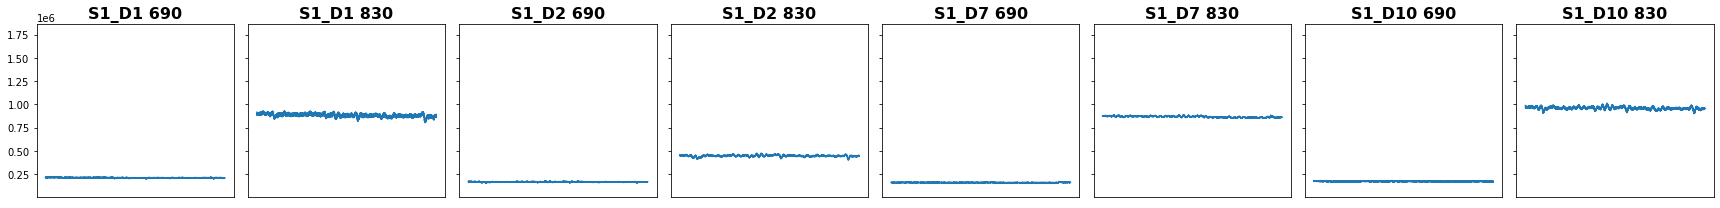

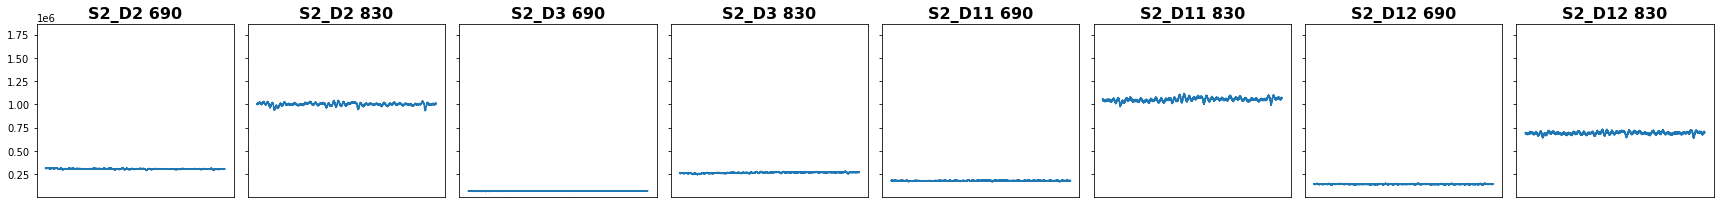

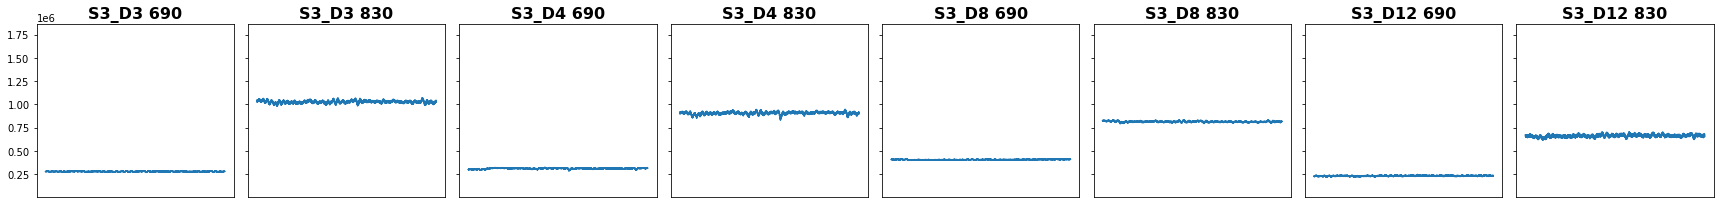

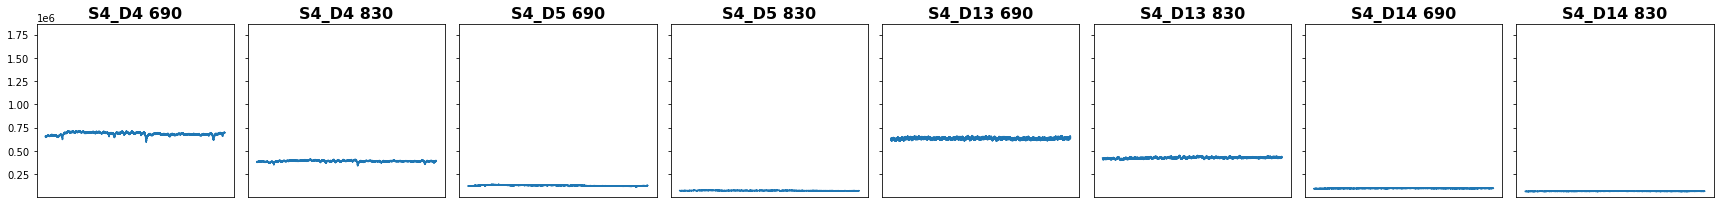

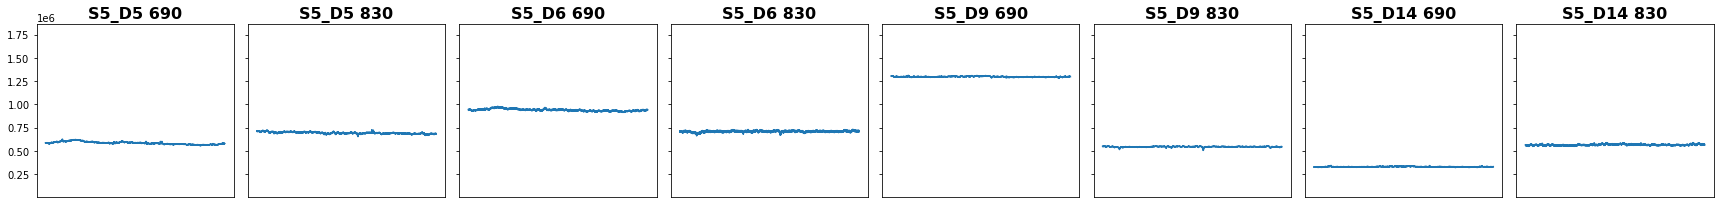

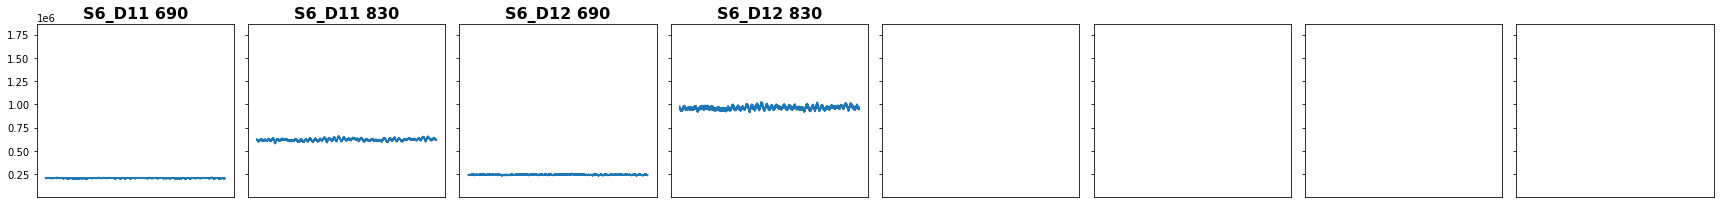

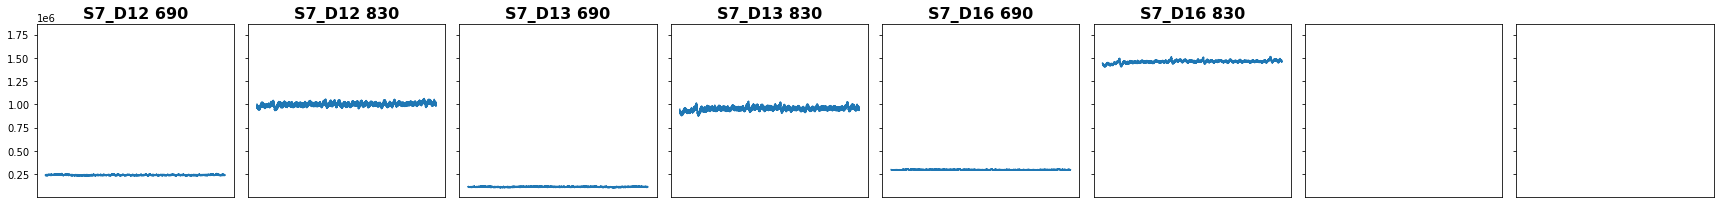

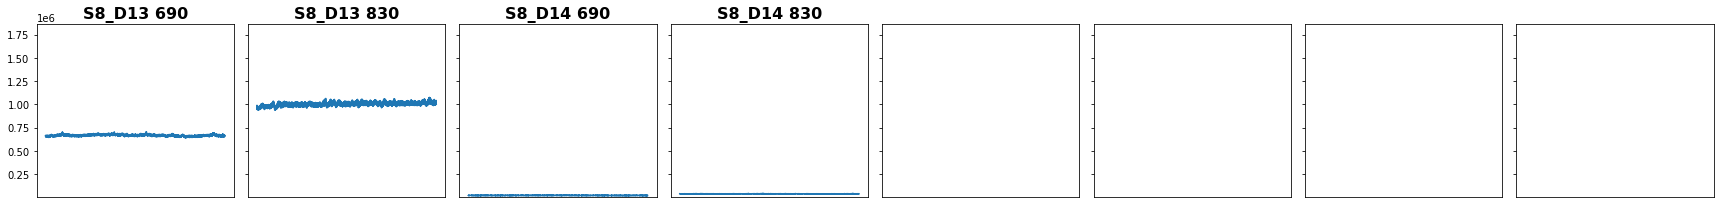

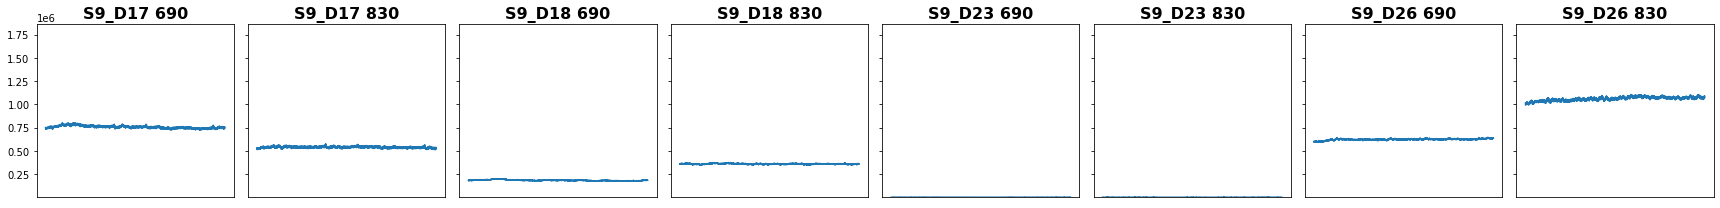

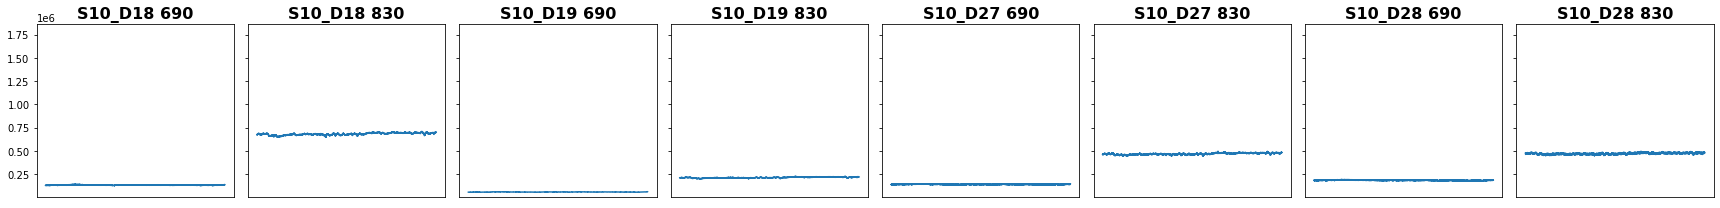

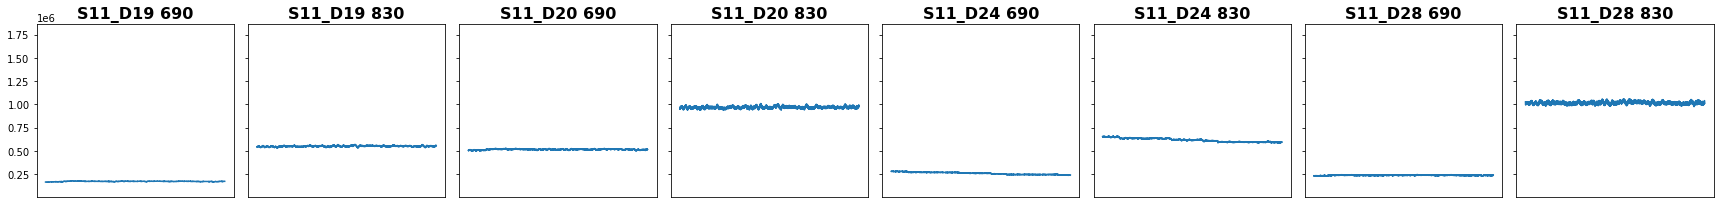

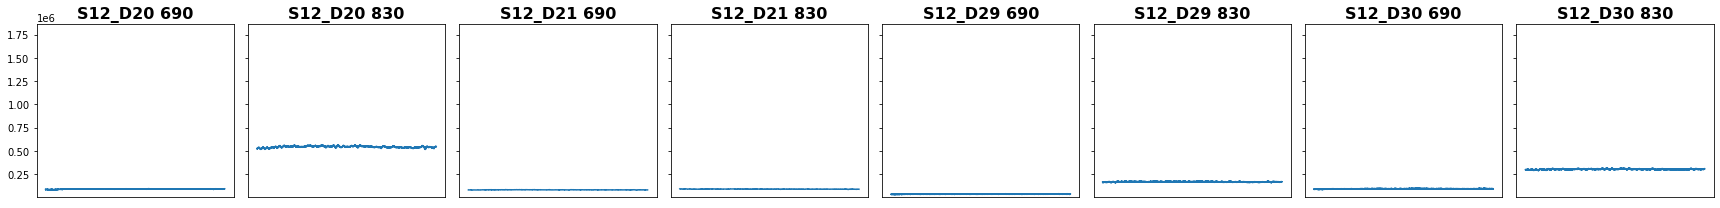

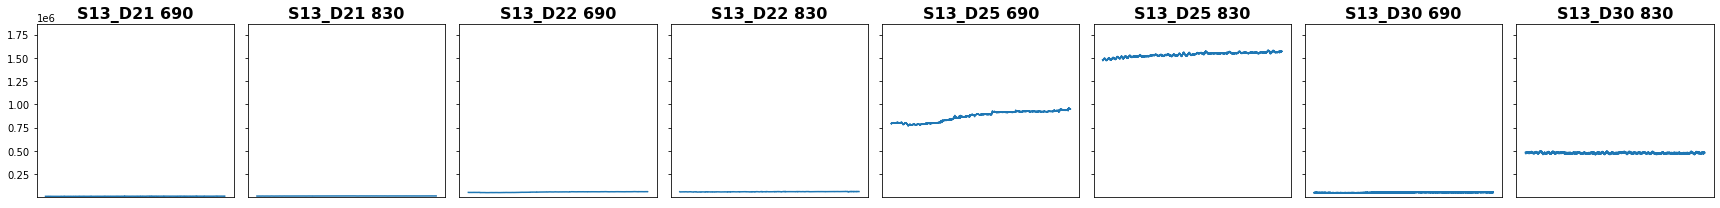

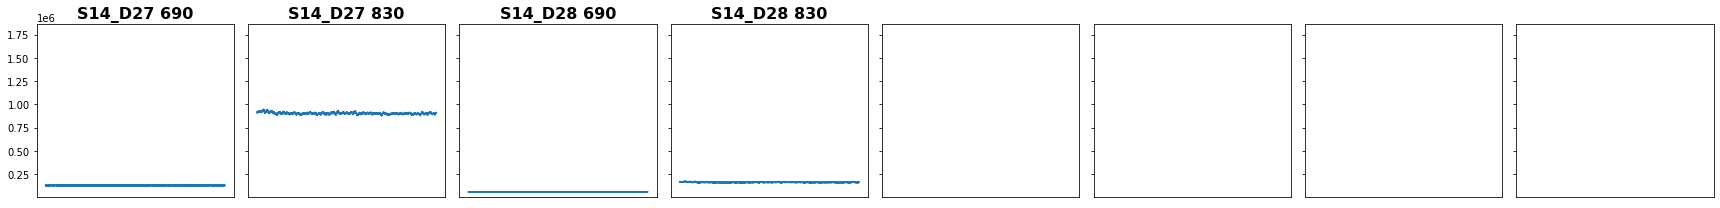

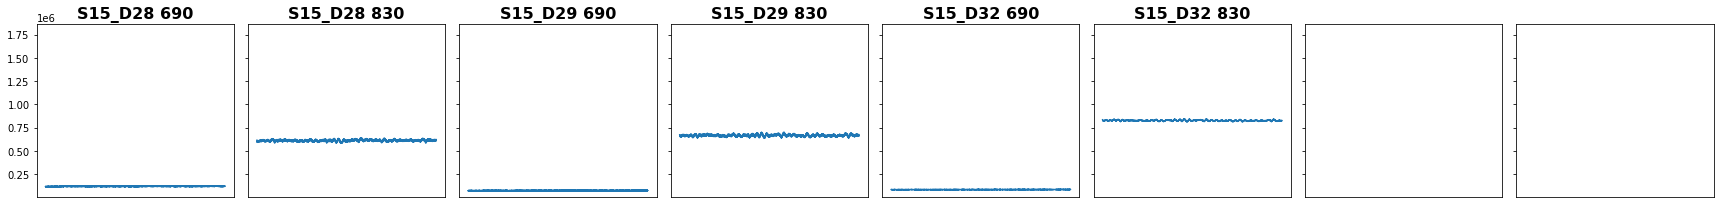

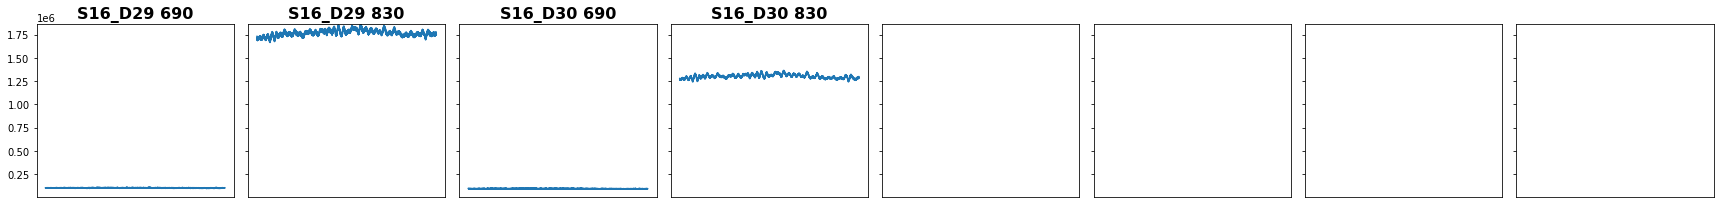

In [115]:
for s in summary_prefix_channels.keys(): 
  fig, ax = plt.subplots(nrows=1, ncols=8, sharex=True, sharey=True,figsize=(24,3))
  i = 0
  for c in summary_prefix_channels_list[s]:
    ax[i].plot(df.index, df[c])
    ax[i].set_title(c, fontsize=16, weight='bold')
    i = i + 1
    plt.xticks([])
    plt.ylim([min_measure, max_measure])

    if i >= 8: 
      print('Warning: Há mais de 8 detectores para a mesma fonte')
      break
 
  plt.tight_layout()
  plt.show()


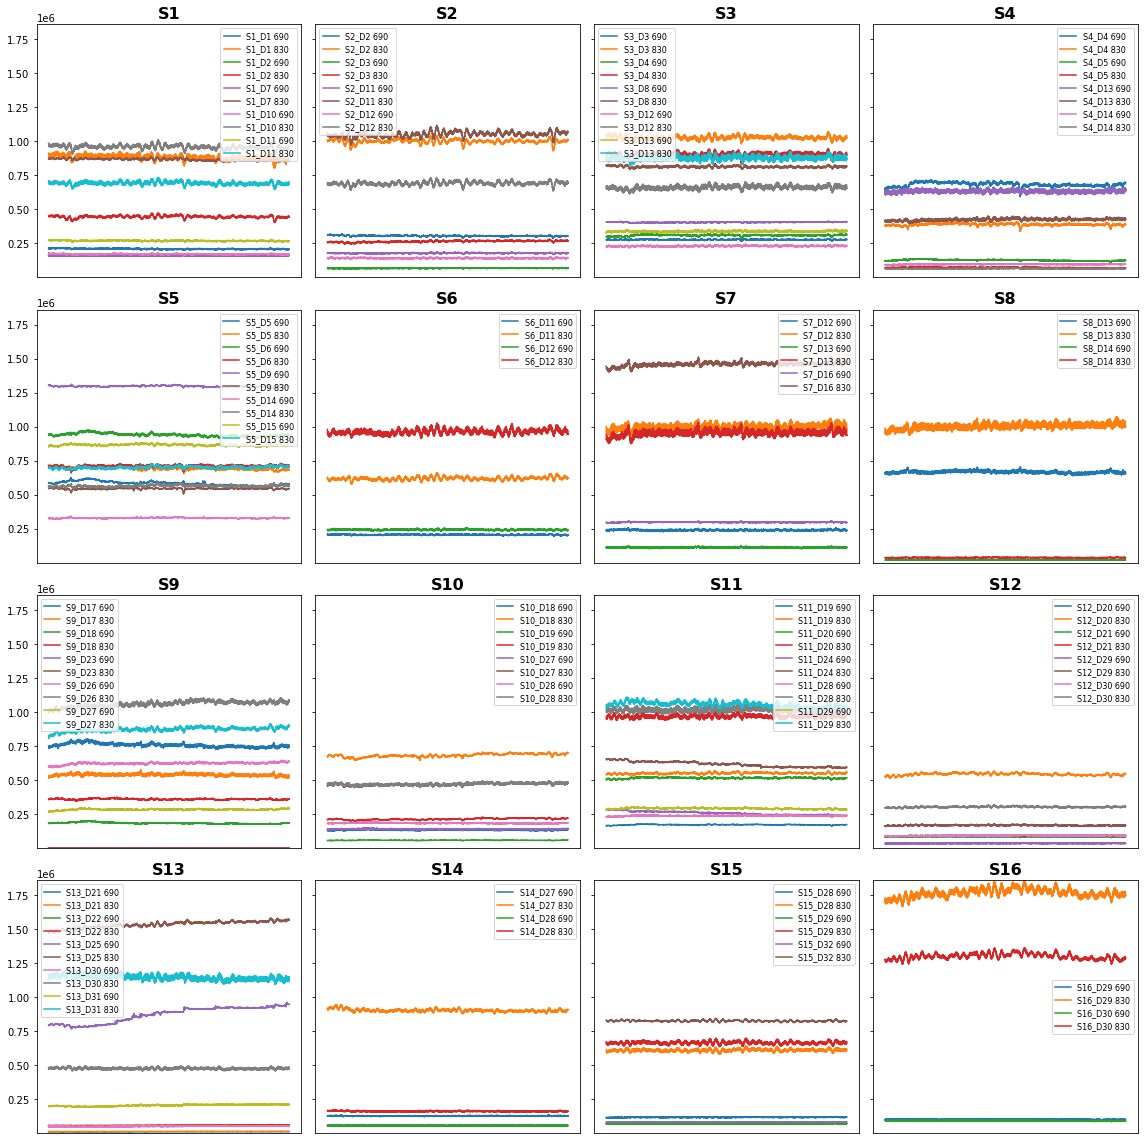

In [116]:
colunas = 4
linhas = int( len( summary_prefix_channels.keys() ) / colunas )

fig, ax = plt.subplots(nrows=linhas, ncols=colunas, sharex=True, sharey=True,figsize=(4*linhas,4*colunas))
i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    ax[i//colunas, i%colunas].plot(df.index, df[c], label=c)
  ax[i//colunas, i%colunas].set_title(s, fontsize=16, weight='bold')
  ax[i//colunas, i%colunas].legend(fontsize=8)
  plt.xticks([])
  plt.ylim([min_measure, max_measure])
  i = i + 1 
  
plt.tight_layout()
plt.show()

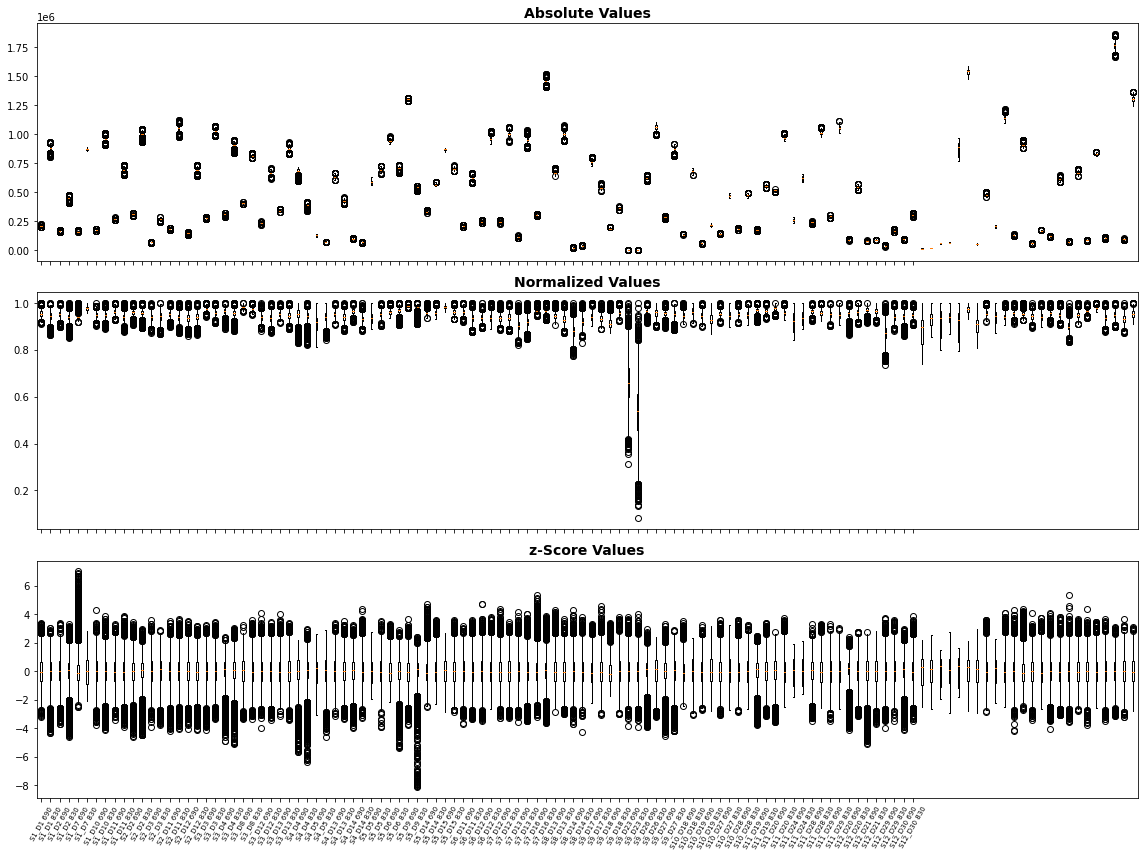

In [117]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(16,12))

i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    ax[0].boxplot(df[c], positions=[i])
    ax[1].boxplot(df[c] / df[c].max(), positions=[i])
    ax[2].boxplot(( df[c] - df[c].mean() ) / df[c].std(), positions=[i])
    i = i + 1

ax[0].set_title('Absolute Values',fontsize=14,weight='bold')    
ax[1].set_title('Normalized Values',fontsize=14,weight='bold') 
ax[2].set_title('z-Score Values',fontsize=14,weight='bold') 

ax[2].set_xticks(ticks=np.arange(0,96))
ax[2].set_xticklabels(labels=df.columns[1::],rotation=60,fontsize=7)

plt.tight_layout()
plt.show()

Entre com um conjunto de canais ou enter para o primeiro conjunto: 


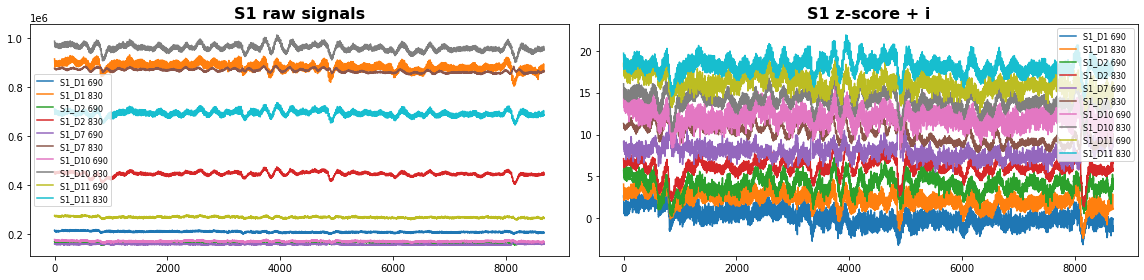

In [118]:
s = input('Entre com um conjunto de canais ou enter para o primeiro conjunto: ')
if s == '': s = list( summary_prefix_channels.keys() )[0]

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16,4))

i = 0
for c in summary_prefix_channels_list[s]:
  ax[0].plot(df.index, df[c] , label=c)
  ax[1].plot(df.index, ( df[c] - df[c].mean() ) / df[c].std() + i*2, label=c)
  i = i + 1

ax[0].set_title(s + ' raw signals', fontsize=16, weight='bold')
ax[0].legend(fontsize=8)

ax[1].set_title(s + ' z-score + i', fontsize=16, weight='bold')
ax[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Obtendo os eventos

In [119]:
for i in range(len(raw_intensity.annotations)):
  print(raw_intensity.annotations[i])

OrderedDict([('onset', 13.56), ('duration', 1.0), ('description', '2'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 13.56), ('duration', 1.0), ('description', '2'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 20.48), ('duration', 1.0), ('description', '3'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 20.48), ('duration', 1.0), ('description', '3'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 29.56), ('duration', 1.0), ('description', '4'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 29.56), ('duration', 1.0), ('description', '4'), ('orig_time', datetime.datetime(2020, 8, 4, 17, 8, 35, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 39.0), ('duration

In [120]:
events = {}
for a in raw_intensity.annotations:
  if a['description'] not in events.keys():
    events[a['description']] = []
  events[a['description']].append(a['onset'])  

events

{'1': [107.28,
  107.28,
  205.24,
  205.24,
  246.4,
  246.4,
  259.92,
  259.92,
  282.28,
  282.28,
  304.36,
  304.36,
  331.0,
  331.0],
 '2': [13.56,
  13.56,
  39.0,
  39.0,
  52.2,
  52.2,
  58.56,
  58.56,
  85.48,
  85.48,
  176.28,
  176.28,
  217.32,
  217.32],
 '3': [20.48,
  20.48,
  65.8,
  65.8,
  95.88,
  95.88,
  160.28,
  160.28,
  182.84,
  182.84,
  313.76,
  313.76,
  340.92,
  340.92],
 '4': [29.56,
  29.56,
  119.96,
  119.96,
  130.72,
  130.72,
  149.24,
  149.24,
  192.0,
  192.0,
  237.04,
  237.04,
  322.28,
  322.28],
 '5': [77.44,
  77.44,
  141.48,
  141.48,
  168.72,
  168.72,
  229.96,
  229.96,
  269.6,
  269.6,
  276.16,
  276.16,
  291.4,
  291.4]}

Entre com um conjunto de canais ou enter para o primeiro conjunto: 


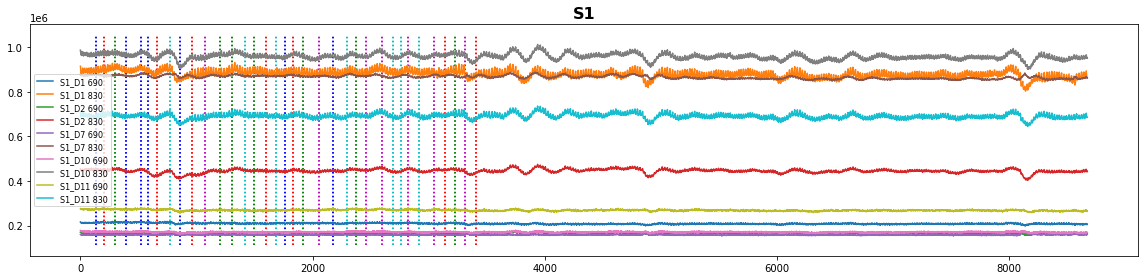

In [121]:
plt.figure(figsize=(16,4))

s = input('Entre com um conjunto de canais ou enter para o primeiro conjunto: ')
if s == '': s = list( summary_prefix_channels.keys() )[0]

for c in summary_prefix_channels_list[s]:
  plt.plot(df.index, df[c], label=c)
plt.title(s, fontsize=16, weight='bold')
plt.legend(fontsize=8)

# print(plt.gca().get_ylim()) # min and max values in y axis
lim = plt.gca().get_ylim()
colors = 'brgcmyk' # até 7 diferentes eventos

i = 0
for e, t_list in events.items():
  i = i + 1
  for t in t_list:
    plt.vlines(t*10,lim[0],lim[1],colors=colors[i-1],linestyles='dotted')

plt.tight_layout()
plt.show()

Entre com um canais ou enter para o primeiro canal: 


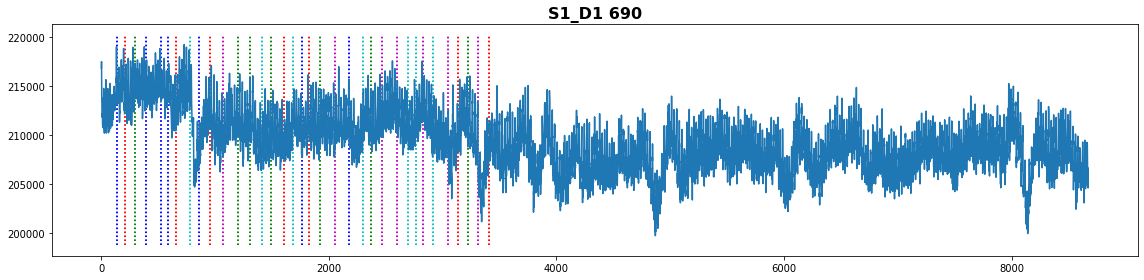

In [122]:
plt.figure(figsize=(16,4))

c = input('Entre com um canais ou enter para o primeiro canal: ')
if c == '': c = df.columns[1] 

plt.plot(df.index, df[c])
plt.title(c, fontsize=16, weight='bold')

# print(plt.gca().get_ylim()) # min and max values in y axis
lim = plt.gca().get_ylim()
colors = 'brgcmyk' # até 7 diferentes eventos

i = 0
for e, t_list in events.items():
  i = i + 1
  for t in t_list:
    plt.vlines(t*10,lim[0],lim[1],colors=colors[i-1],linestyles='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# raw_intensity.ch_names

In [ ]:
# raw_intensity.get_channel_types()